In [28]:
import pandas as pd
import numpy as np

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data._get_numeric_data()
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20171012)

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [114]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.05, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

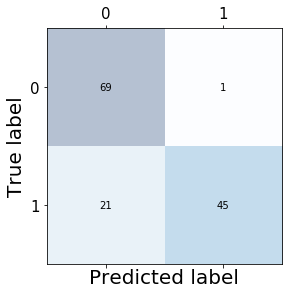

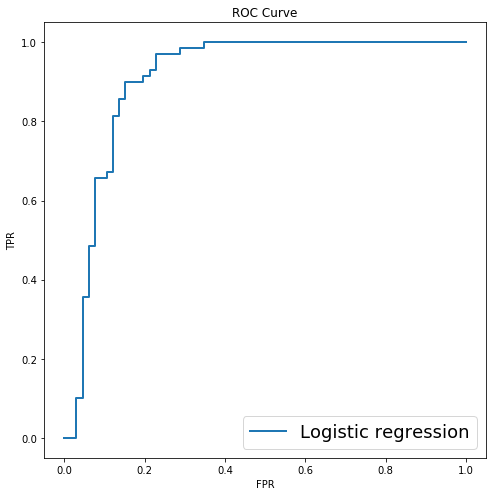

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
    
from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler

fig = plt.figure(figsize=(7,7))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

probas = lr.predict_proba(X_test_std)

fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)
plt.plot(fpr, tpr, lw=2,
         label='Logistic regression')
    

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.legend(loc=4, prop={'size': 18})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./Lab06-103062212.png', dpi=300)
plt.show()

In [123]:
from sklearn.metrics import auc

print('AUC: %.2f' % auc(fpr, tpr))

AUC: 0.91


In [124]:
### Evaluation and explanation of the performance of the model using the results from the confusion matrix and the ROC curve

### 如果單從confusion matrix 來看，model判斷為1的情況是相當準確的，46筆裡面只有1筆是誤判的
### 不過如果判斷為class 0就相對來說比較高的機率誤判了 20%左右

### 從ROC來看的話，我們也可以發現TPR在FPR達到0.4以前就已經是1.0了，也就是說整體model在判斷上的效果是不錯的